In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
#from jupyterthemes import jtplot
#jtplot.style(theme='grade3')
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('font', family='NanumGothic') # For Windows

In [40]:
a=pd.read_csv('블록별 성별연령대별 카드소비패턴.csv',encoding='cp949')
b=pd.read_csv('블록별 시간대별소액결제건수 카드소비패턴.csv',encoding='cp949')
c=pd.read_csv('집계구별 일별소비지역별 카드소비패턴.csv',encoding='cp949')
d=pd.read_csv('집계구별 일별시간대별 카드소비패턴.csv',encoding='cp949')
e=pd.read_csv('카드소비 업종코드.csv',encoding='cp949')

### 카드 사용금액과 이용건수 관계!

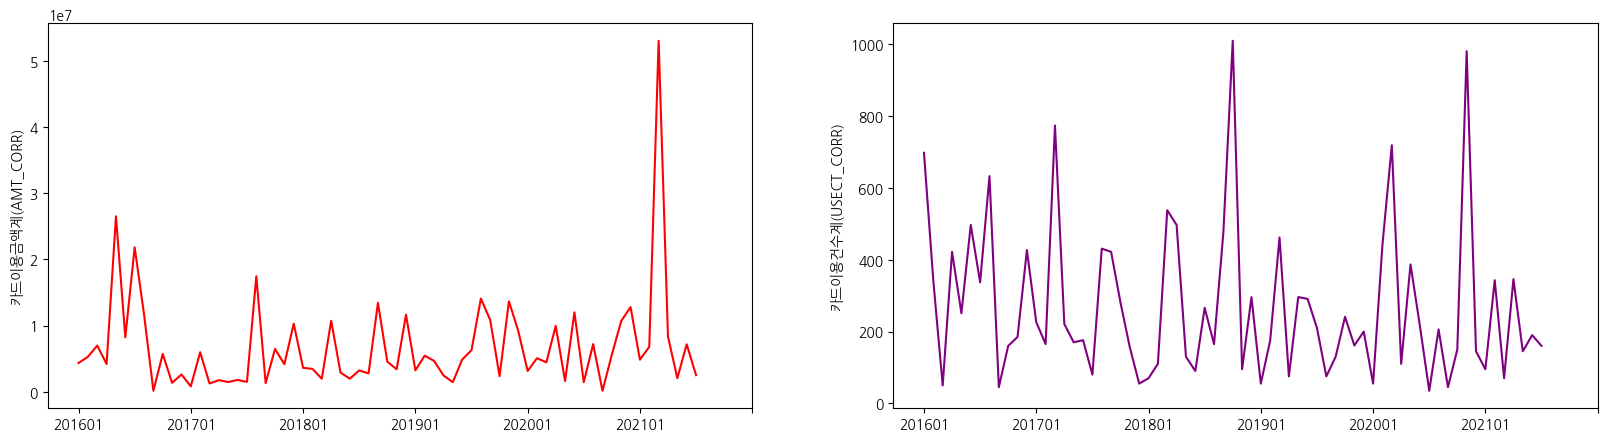

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
month_amt=pd.DataFrame(a.groupby('기준년월(YM)')['카드이용금액계(AMT_CORR)'].sum()).reset_index()
li=sns.lineplot(range(0,67,1),month_amt['카드이용금액계(AMT_CORR)'],color='red')
li.set_xticks([0,12,24,36,48,60,72])
li.set_xticklabels(month_amt['기준년월(YM)'].unique()[0:67:12])
plt.subplot(1,2,2)
month_amt=pd.DataFrame(a.groupby('기준년월(YM)')['카드이용건수계(USECT_CORR)'].sum()).reset_index()
li2=sns.lineplot(range(0,67,1),month_amt['카드이용건수계(USECT_CORR)'],color='purple')
li2.set_xticks([0,12,24,36,48,60,72])
li2.set_xticklabels(month_amt['기준년월(YM)'].unique()[0:67:12])
plt.show()

카드 사용금액이 높으면 이용건수가 높다. 하지만 이용건수가 많다고 사용금액이 높진 않다는 것을 알 수 있다. 대표적으로 2018년 10월이 있다.

### 성별과 사용금액 관계

In [42]:
sung=a.groupby(['성별(GEDNER)','기준년월(YM)'])['카드이용금액계(AMT_CORR)'].sum().reset_index()
amt=a.groupby(['성별(GEDNER)','기준년월(YM)'])['카드이용건수계(USECT_CORR)'].sum().reset_index()

In [43]:
f_sung=sung[sung['성별(GEDNER)']=='F']
m_sung=sung[sung['성별(GEDNER)']=='M']
f_amt=amt[amt['성별(GEDNER)']=='F']
m_amt=amt[amt['성별(GEDNER)']=='M']

[Text(0, 0, '201601'),
 Text(0, 0, '201702'),
 Text(0, 0, '201803'),
 Text(0, 0, '201903'),
 Text(0, 0, '202003'),
 Text(0, 0, '202103')]

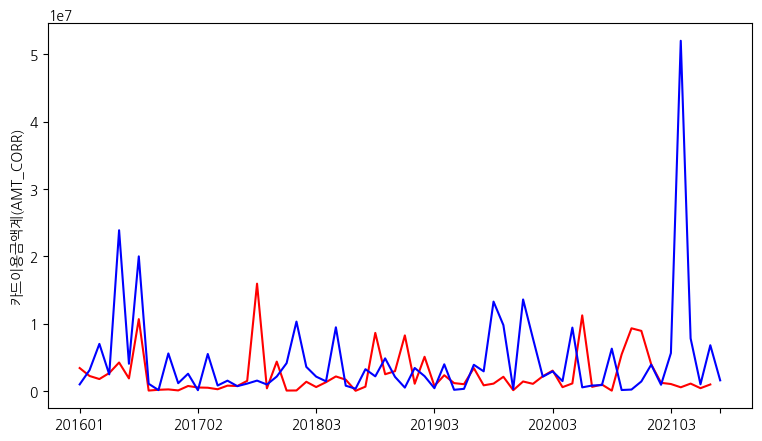

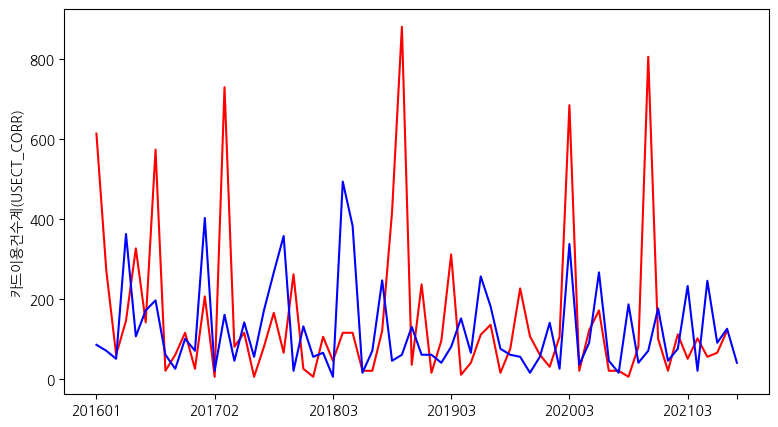

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
li2=sns.lineplot(range(0,65,1),f_sung['카드이용금액계(AMT_CORR)'],color='red')
li3=sns.lineplot(range(0,66,1),m_sung['카드이용금액계(AMT_CORR)'],color='blue')
li2.set_xticks([0,12,24,36,48,60,65])
li2.set_xticklabels(f_sung['기준년월(YM)'].unique()[0:66:12])
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
li2=sns.lineplot(range(0,65,1),f_amt['카드이용건수계(USECT_CORR)'],color='red')
li3=sns.lineplot(range(0,66,1),m_amt['카드이용건수계(USECT_CORR)'],color='blue')
li2.set_xticks([0,12,24,36,48,60,65])
li2.set_xticklabels(f_amt['기준년월(YM)'].unique()[0:66:12])

성별 별로 사용량을 비교해보았다. 사용금액은 비슷해 보이지만 사용 횟수는 여자가 좀 더 많아 보입니다.\
아래 원그래프 보면은 사용금액은 남자가 많은데 금액은 여자가 많은것을 원 그래프로 확인했답니다!

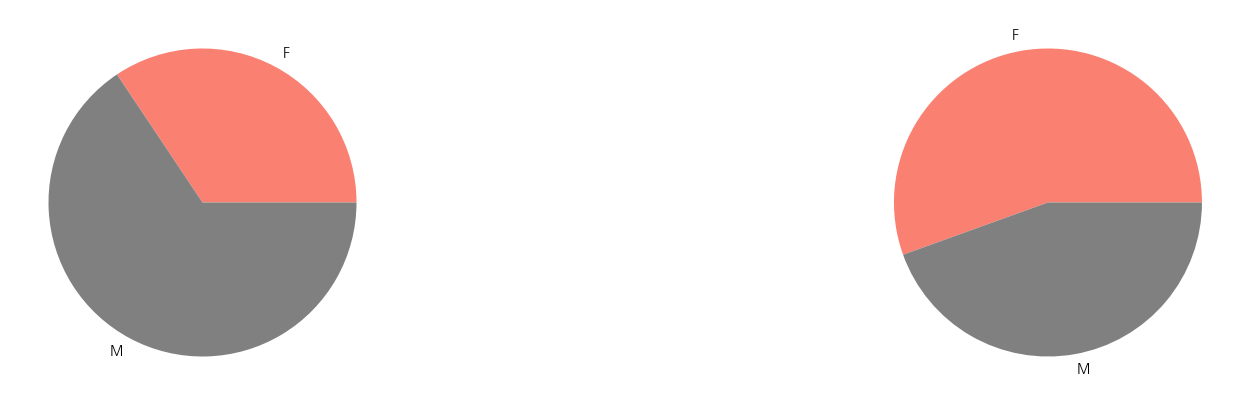

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sung=a.groupby(['성별(GEDNER)'])['카드이용금액계(AMT_CORR)'].sum().reset_index()
pie=plt.pie(sung['카드이용금액계(AMT_CORR)'],labels=sung['성별(GEDNER)'],colors=['salmon','gray'])
plt.subplot(1,2,2)
amt=a.groupby(['성별(GEDNER)'])['카드이용건수계(USECT_CORR)'].sum().reset_index()
pie=plt.pie(amt['카드이용건수계(USECT_CORR)'],labels=amt['성별(GEDNER)'],colors=['salmon','gray'])

In [46]:
sung=a.groupby(['성별(GEDNER)','기준년월(YM)'])['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
f_sung=sung[sung['성별(GEDNER)']=='F']
m_sung=sung[sung['성별(GEDNER)']=='M']

In [47]:
f_sung.head()

,성별(GEDNER),기준년월(YM),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,F,201601,3384687,613
1,F,201602,2207516,271
2,F,201604,1750742,60
3,F,201605,2641756,145
4,F,201606,4208601,326


In [48]:
f_sung=f_sung.append({'성별(GEDNER)':'F','기준년월(YM)':201603,'카드이용금액계(AMT_CORR)':0,'카드이용건수계(USECT_CORR)':0},ignore_index=True)

In [49]:
f_sung.sort_values(by='기준년월(YM)',ignore_index=True).head()

,성별(GEDNER),기준년월(YM),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,F,201601,3384687,613
1,F,201602,2207516,271
2,F,201603,0,0
3,F,201604,1750742,60
4,F,201605,2641756,145


<Figure size 640x480 with 0 Axes>

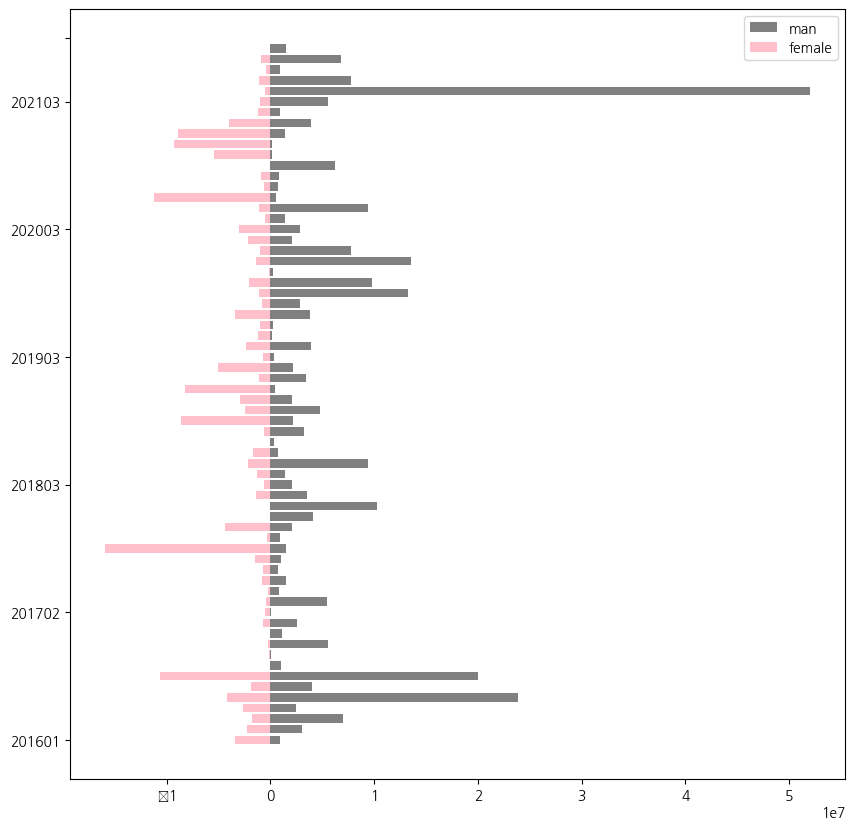

In [50]:
plt.figure()
plt.figure(figsize=(10,10))
plt.barh(range(0,66,1),m_sung['카드이용금액계(AMT_CORR)'],color='gray')
plt.barh(range(0,66,1),-f_sung['카드이용금액계(AMT_CORR)'],color='pink')
plt.yticks([0,12,24,36,48,60,66],labels=f_amt['기준년월(YM)'].unique()[0:66:12])
plt.legend(['man','female'])

확실히 남성이 지출은 크다는 것을 확인 할 수 있다.

### 연령별 지출

In [51]:
age_amt=a.groupby(['연령대별(AGE)'])['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
#age_use=a.groupby(['연령대별(AGE)'])['카드이용건수계(USECT_CORR)'].sum().reset_index()

In [52]:
age_amt['카드이용건수계(USECT_CORR)']=age_amt['카드이용건수계(USECT_CORR)']

Text(0.5, 0, '이용건수')

<Figure size 640x480 with 0 Axes>

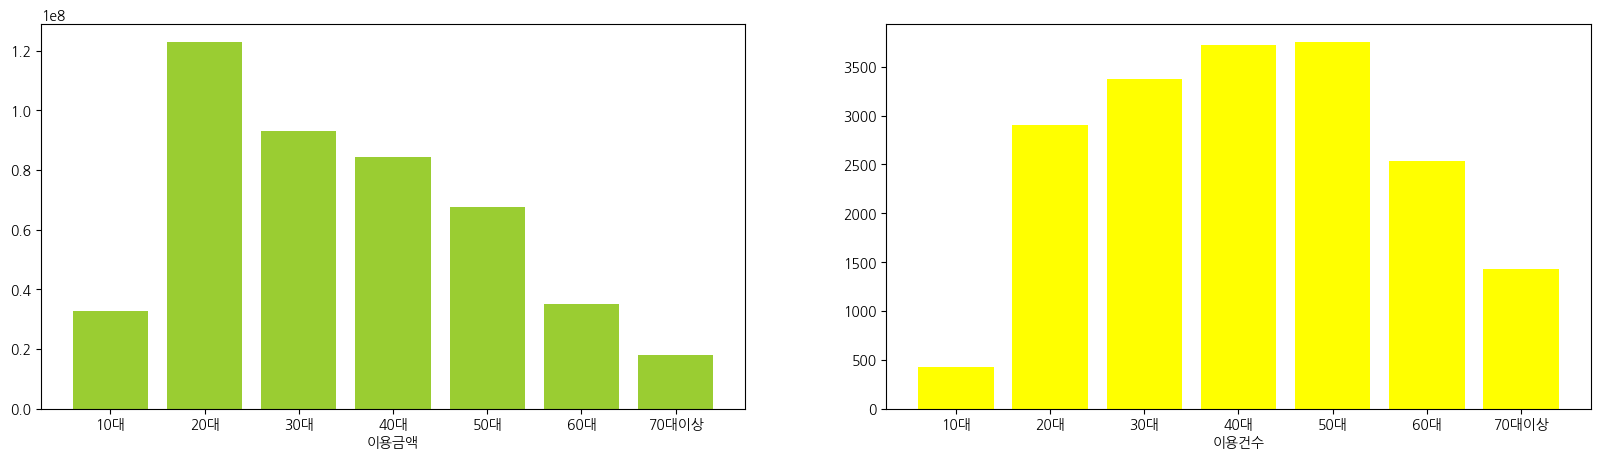

In [53]:
plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(age_amt['연령대별(AGE)'],age_amt['카드이용금액계(AMT_CORR)'],color='yellowgreen')
plt.xlabel('이용금액')
plt.subplot(1,2,2)
plt.bar(age_amt['연령대별(AGE)'],age_amt['카드이용건수계(USECT_CORR)'],color='yellow')
plt.xlabel('이용건수')

20대의 이용금액이 가장 많다. 이용건수는 4,50대가 가장 많다. 이용건수와 이용금액은 상관이 적은것 같다. 

### 어느 업종에 돈을 많이 쓰나?

In [54]:
e=e.rename(columns={'업종코드(UPJONG_CD)':'서울시민업종코드(UPJONG_CD)'})
for i in range(len(e)):
    e['서울시민업종코드(UPJONG_CD)'][i]= e['서울시민업종코드(UPJONG_CD)'][i].upper()

In [55]:
a_e=a.merge(e)
a_e.head()

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,SS013,201906,14037,F,50대,48288,65,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
1,SS013,201710,282738,F,40대,2663385,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
2,SS013,202005,24909,F,20대,960730,101,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
3,SS013,202012,358999,M,40대,566831,5,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
4,SS013,201602,216302,M,20대,422520,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓


Text(0.5, 0, '이용건수')

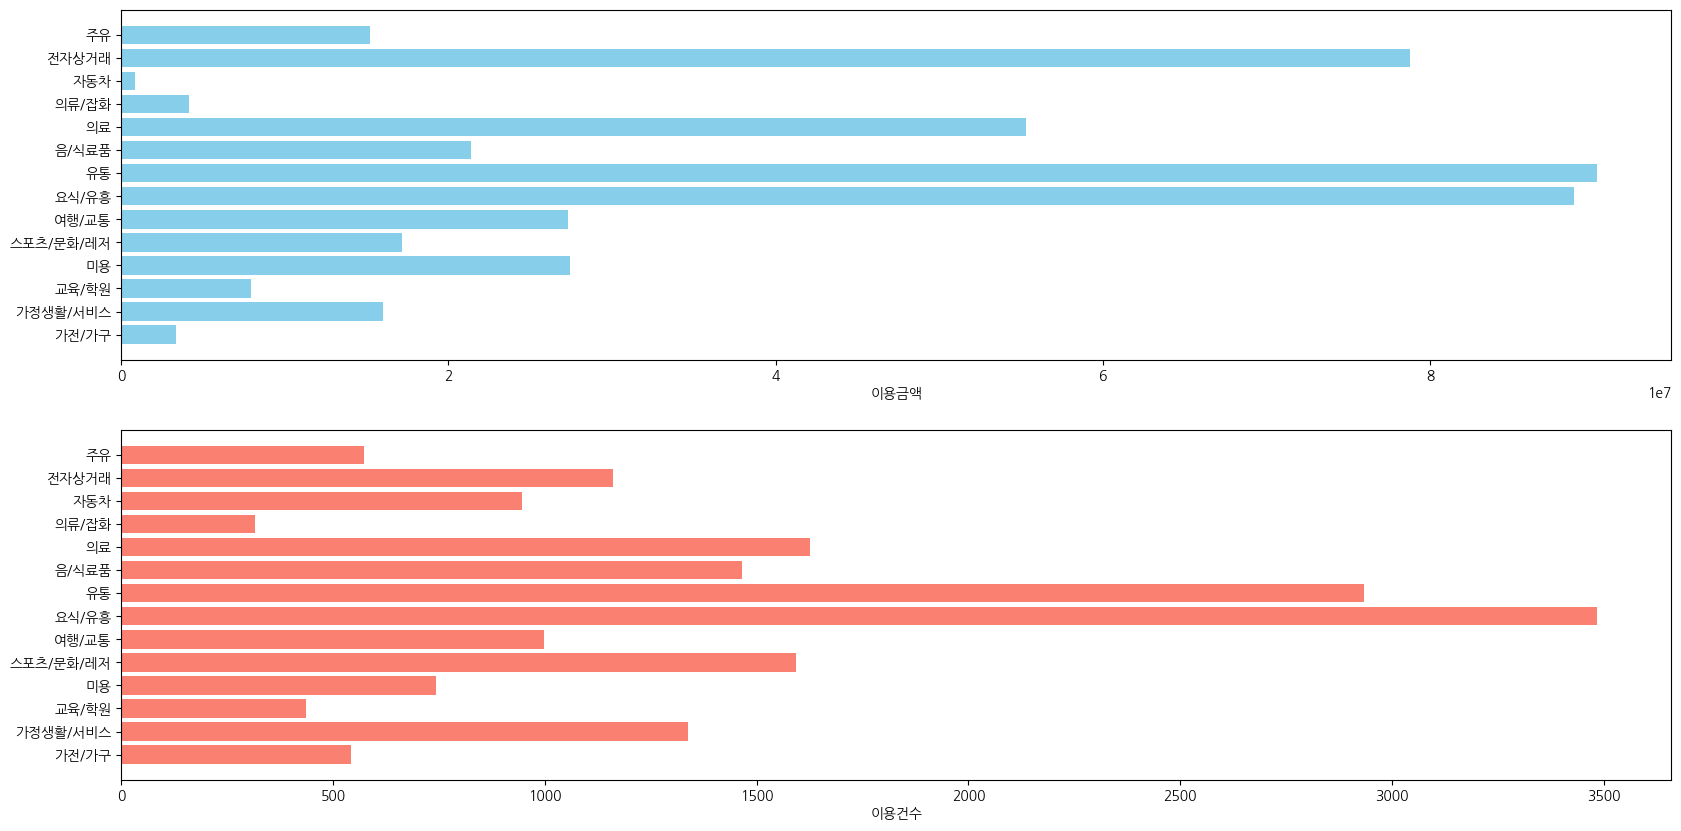

In [56]:
plt.figure(figsize=(20,10))
cls1=a_e.groupby(['대분류(CLASS1)'])['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
plt.subplot(2,1,1)
plt.barh(cls1['대분류(CLASS1)'],cls1['카드이용금액계(AMT_CORR)'],color='skyblue')
plt.xlabel('이용금액')
plt.subplot(2,1,2)
plt.barh(cls1['대분류(CLASS1)'],cls1['카드이용건수계(USECT_CORR)'],color='salmon')
plt.xlabel('이용건수')

각 대분류 별 카드이용금액과 이용횟수를 확인해보았다. \
전자상거래의 경우는 이용금액은 높으나 이용건수가 낮다. \
반대로 자동차는 이용건수는 많고 이용금액은 낮다. 이것은 아마 소액결제가 많지 않을까?? 라고 생각

### 성별과 업종대분류를 시각화 해보자. 
### 여자 남자는 과연 돈을 쓰는 분야에서 차이를 보일것인가

In [88]:
su=a_e.groupby(['성별(GEDNER)','대분류(CLASS1)'])['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
su_f=su[su['성별(GEDNER)']=='F']
su_m=su[su['성별(GEDNER)']=='M']

In [91]:
su_f

,성별(GEDNER),대분류(CLASS1),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,F,가전/가구,1422534,90
1,F,가정생활/서비스,4375210,455
2,F,교육/학원,2653325,141
3,F,미용,2705989,176
4,F,스포츠/문화/레저,9276125,1000
5,F,여행/교통,12589236,487
6,F,요식/유흥,46570995,1810
7,F,유통,34045859,1958
8,F,음/식료품,6792311,1050
9,F,의료,15924025,1023


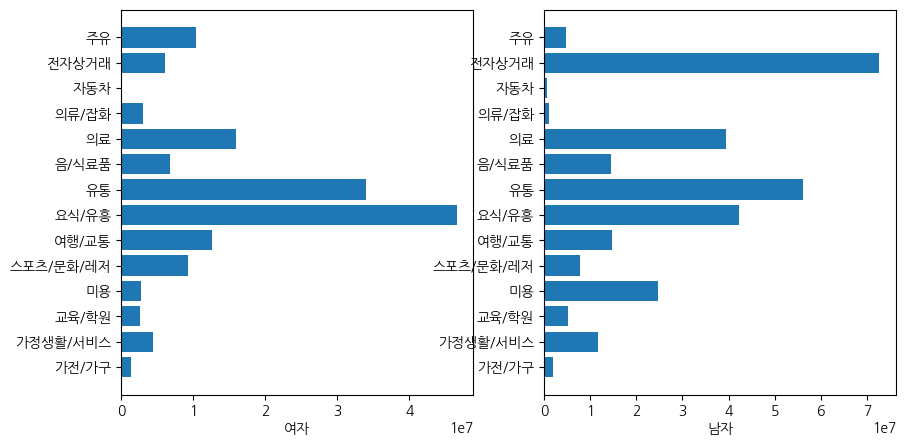

In [89]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.barh(su_f['대분류(CLASS1)'],su_f['카드이용금액계(AMT_CORR)'])
plt.xlabel('여자')
plt.subplot(1,2,2)
plt.barh(su_m['대분류(CLASS1)'],su_m['카드이용금액계(AMT_CORR)'])
plt.xlabel('남자')
plt.show()

x축을 보면 앞에서도 알아본 내용처럼 scale이 남자가 훨씬 크다. 의외의 모습은 미용에 남자가 더 많은 돈을 쓴다는 것이다. 또 의외인건 남자보다 여자가 주유에 많은 돈을 썼다는 것이다. 그리고 전자상거래는 남자가 훨씬 많다. 예상은 게임 현질인거 같은데 모르겠다. 그리고 요식/ 유흥은 여자가 훨씬 많다. 우리집만 해도 외식하면 엄마가 긁는다. 

In [57]:
a_e.head()

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,SS013,201906,14037,F,50대,48288,65,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
1,SS013,201710,282738,F,40대,2663385,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
2,SS013,202005,24909,F,20대,960730,101,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
3,SS013,202012,358999,M,40대,566831,5,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
4,SS013,201602,216302,M,20대,422520,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓


<BarContainer object of 14 artists>

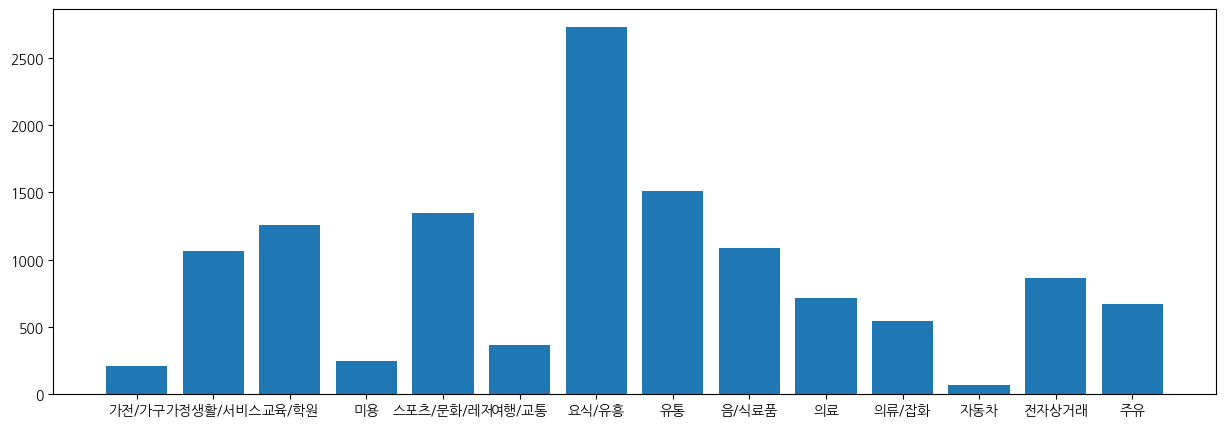

In [58]:
b_e=b.merge(e)
b_e.head()
cls2=b_e.groupby('대분류(CLASS1)')['카드이용금액계(AMT_CORR)','소액결제건수(MICRO_PYM)'].sum().reset_index()
plt.figure(figsize=(15,5))
plt.bar(cls2['대분류(CLASS1)'],cls2['소액결제건수(MICRO_PYM)'])

그렇지는 않았다. 의외로 요식/유흥이 소액결제가 많구나... 오히려 굉장히 자동차 소액결제는 작다.\
+나중에 든 생각인데 한번에 결제금액이 작다고 해도 엄청 작아야 소액결제인데 자동차 관련 물품은 뭘 사도 소액은 아니겠네,.

### 지역구별 카드사용금액-> 어디가 많을까

In [59]:
c.dropna(inplace=True)
c.head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
5,경기,마포구,유통,20200319,1108060020010,20120,25


In [60]:
c['가맹점주소시군구(SGG)'].unique()

array(['강남구', '관악구', '마포구', '동작구', '종로구', '송파구', '용인시', '중구', '용산구',
       '성북구', '노원구', '서초구', '강서구', '중랑구', '화성시', '남양주시', '가평군', '서대문구',
       '광진구', '부천시', '양천구', '파주시', '영등포구', '수원시', '구리시', '성남시', '도봉구',
       '광주시', '은평구', '옹진군', '구로구', '시흥시', '동대문구', '강동구', '안산시', '고양시',
       '김포시', '평택시', '성동구', '강북구', '이천시', '연수구', '의정부시', '양주시', '남동구',
       '금천구', '부평구', '오산시', '강화군', '하남시', '광명시', '안양시', '양평군'],
      dtype=object)

<BarContainer object of 15 artists>

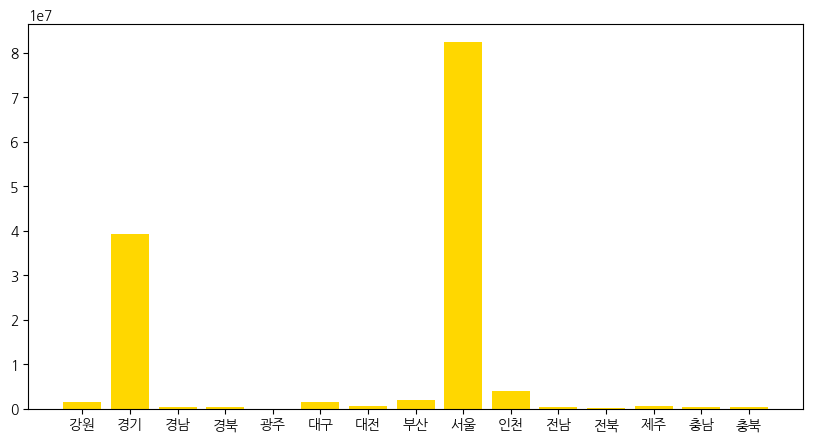

In [61]:
sido=c.groupby('가맹점주소광역시도(SIDO)')['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.bar(sido['가맹점주소광역시도(SIDO)'],sido['카드이용금액계(AMT_CORR)'],color='gold')

<BarContainer object of 53 artists>

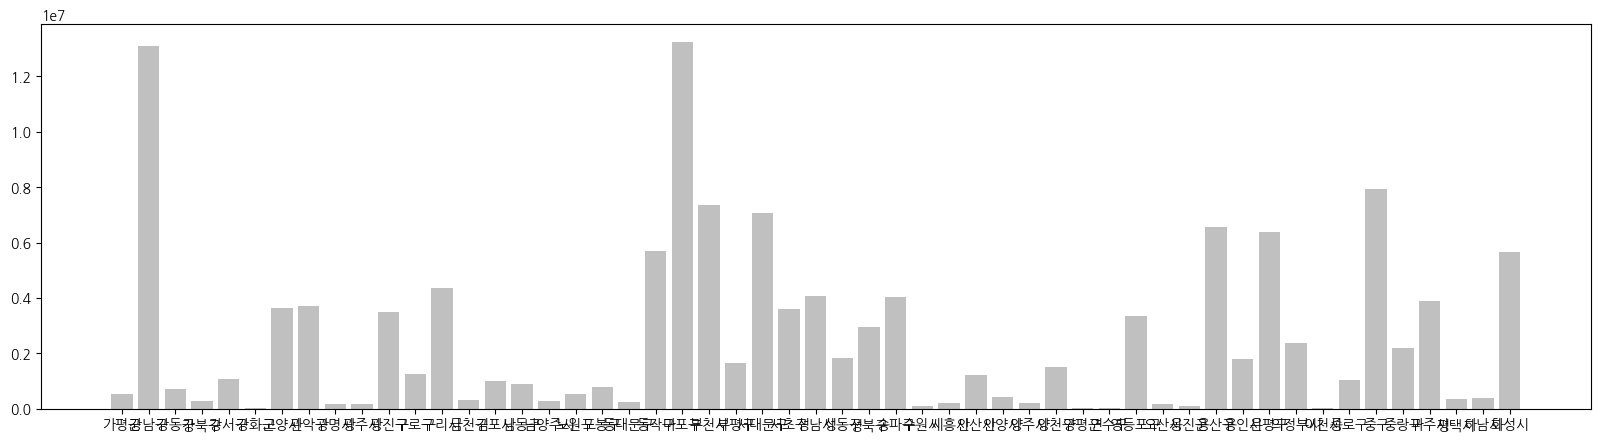

In [62]:
gungu=c.groupby('가맹점주소시군구(SGG)')['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)'].sum().reset_index()
plt.figure(figsize=(20,5))
plt.bar(gungu['가맹점주소시군구(SGG)'],gungu['카드이용금액계(AMT_CORR)'],color='silver')

<BarContainer object of 10 artists>

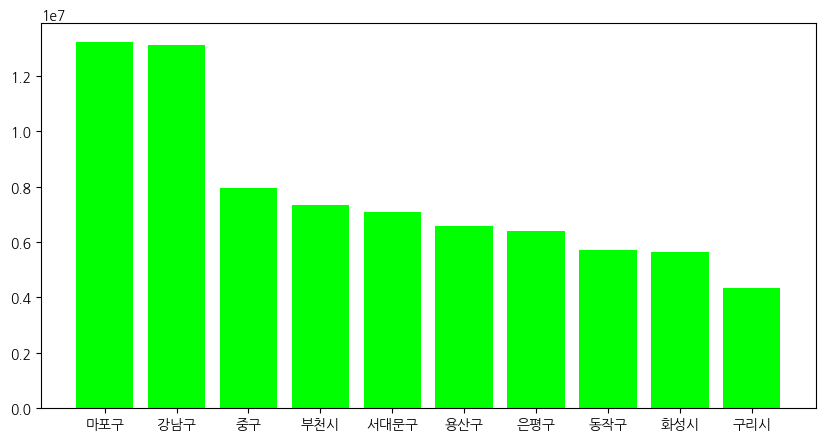

In [63]:
gungu.sort_values(by='카드이용금액계(AMT_CORR)',ascending=False,inplace=True)
top=gungu[:10]
plt.figure(figsize=(10,5))
plt.bar(top['가맹점주소시군구(SGG)'],top['카드이용금액계(AMT_CORR)'],color='lime')

마포구 강남구가 압도적으로 많다.

### 계절별로 업종을 비교해보자!

In [64]:
y=[]
da=[]
m=[]
s=[]
for i in range(len(d)):
    y.append(int(str(d['기준일자(YMD)'].iloc[i])[:4]))
    m.append(int(str(d['기준일자(YMD)'].iloc[i])[4:6]))
    if int(str(d['기준일자(YMD)'].iloc[i])[4:6]) in [12,1,2]:
        s.append('winter')
    elif int(str(d['기준일자(YMD)'].iloc[i])[4:6]) in [3,4,5]:
        s.append('spring')
    elif int(str(d['기준일자(YMD)'].iloc[i])[4:6]) in [6,7,8]:
        s.append('summer')
    elif int(str(d['기준일자(YMD)'].iloc[i])[4:6]) in [9,10,11]:
        s.append('fall')
    da.append(int(str(d['기준일자(YMD)'].iloc[i])[6:]))

In [65]:
d['year']=y
d['month']=m
d['day']=da
d['season']=s

In [69]:
sea=d.groupby(['season','업종대분류(UPJONG_CLASS1)'])['카드이용건수계(USECT_CORR)','카드이용금액계(AMT_CORR)'].sum().reset_index()
sp=sea[sea['season']=='spring']
su=sea[sea['season']=='summer']
fa=sea[sea['season']=='fall']
wi=sea[sea['season']=='winter']

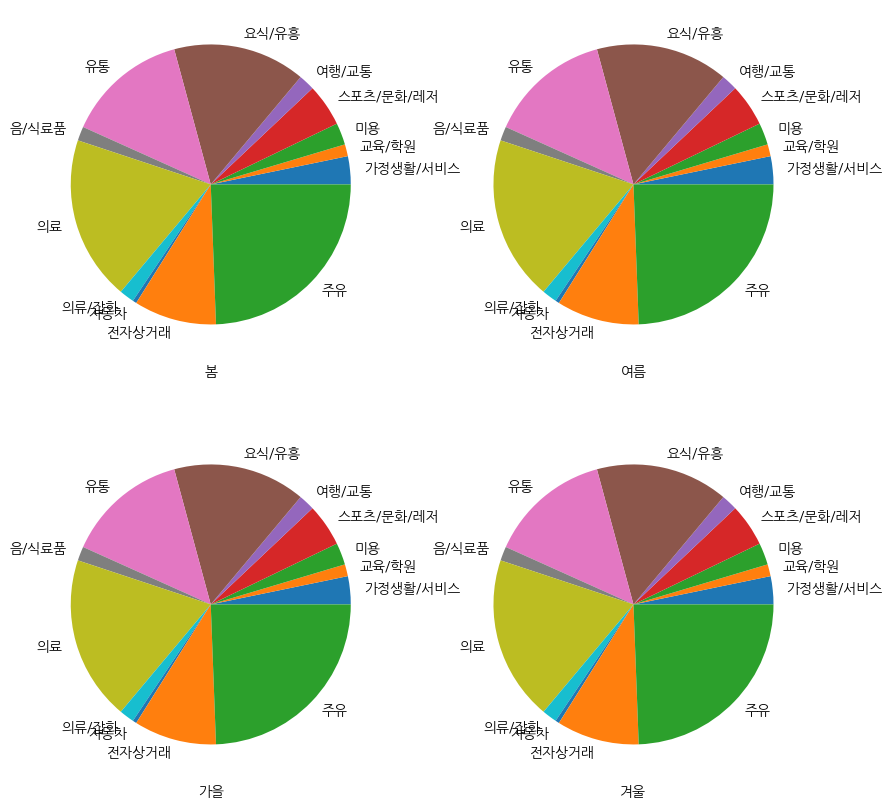

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.pie(sp['카드이용금액계(AMT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('봄')
plt.subplot(2,2,2)
plt.pie(sp['카드이용금액계(AMT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('여름')
plt.subplot(2,2,3)
plt.pie(sp['카드이용금액계(AMT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('가을')
plt.subplot(2,2,4)
plt.pie(sp['카드이용금액계(AMT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('겨울')
plt.show()

계절별로 금액적 차이가 크지 않다... 무의미..

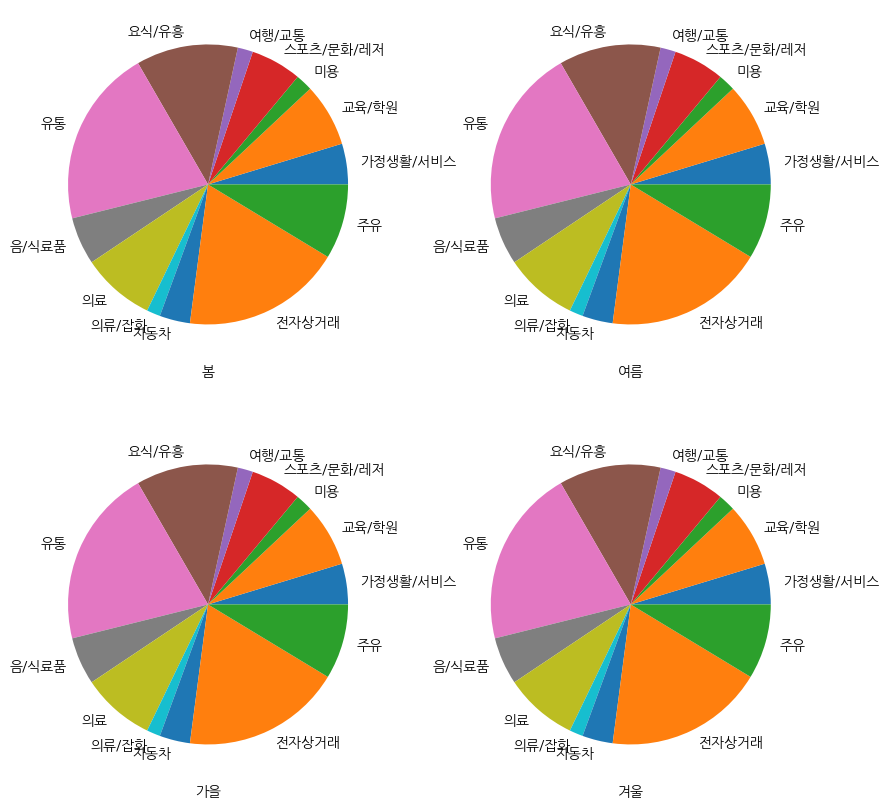

In [71]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.pie(sp['카드이용건수계(USECT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('봄')
plt.subplot(2,2,2)
plt.pie(sp['카드이용건수계(USECT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('여름')
plt.subplot(2,2,3)
plt.pie(sp['카드이용건수계(USECT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('가을')
plt.subplot(2,2,4)
plt.pie(sp['카드이용건수계(USECT_CORR)'],labels=sp['업종대분류(UPJONG_CLASS1)'])
plt.xlabel('겨울')
plt.show()

이것또한 무의미한 결과를 보인다...

In [33]:
d.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),year,month,day,season
0,요식/유흥,20161004,6,1123076010009,104624,10,2016,10,4,fall
1,유통,20210303,5,1122060030003,382592,20,2021,3,3,spring
2,유통,20170606,6,1123066022301,341688,5,2017,6,6,summer
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017,12,6,winter
4,의료,20160909,6,1113075030002,217985,50,2016,9,9,fall


In [34]:
b.head()

,서울시민업종코드(UPJONG_CD),기준년월(YM),시간대구간(TIME),고객주소블록코드(BLOCK_CD),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM)
0,SS017,202006,6,11063,257,25
1,SS013,201608,6,216137,86,10
2,SS016,201802,3,224819,35,15
3,SS055,201906,2,19869,10,0
4,SS038,201612,5,28382,10,5


In [72]:
a.head()

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5


In [36]:
d.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),year,month,day,season
0,요식/유흥,20161004,6,1123076010009,104624,10,2016,10,4,fall
1,유통,20210303,5,1122060030003,382592,20,2021,3,3,spring
2,유통,20170606,6,1123066022301,341688,5,2017,6,6,summer
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017,12,6,winter
4,의료,20160909,6,1113075030002,217985,50,2016,9,9,fall


In [37]:
e.head()

,서울시민업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,SS001,요식/유흥,한식,한식
1,SS002,요식/유흥,일식/중식/양식,일식
2,SS003,요식/유흥,일식/중식/양식,양식
3,SS004,요식/유흥,일식/중식/양식,중식
4,SS005,요식/유흥,제과/커피/패스트푸드,제과점


In [73]:
print('a',a.shape)
print('b',b.shape)
print('c',c.shape)
print('d',d.shape)
print('e',e.shape)

a (500, 7)
b (500, 6)
c (442, 7)
d (500, 10)
e (75, 4)


In [422]:
e=e.rename(columns={'업종코드(UPJONG_CD)':'서울시민업종코드(UPJONG_CD)'})

In [440]:
a=a.merge(e,on='서울시민업종코드(UPJONG_CD)')
a

,기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),대분류(CLASS1)_x,중분류(CLASS2)_x,소분류(CLASS3)_x,대분류(CLASS1)_y,중분류(CLASS2)_y,소분류(CLASS3)_y,서울시민업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)


In [424]:
a['대분류(CLASS1)'].unique()

array([], dtype=object)